In [1]:
%reload_kedro
import warnings
warnings.filterwarnings("ignore")

2020-06-02 12:14:01,043 - root - INFO - ** Kedro project tesis
2020-06-02 12:14:01,043 - root - INFO - Defined global variable `context` and `catalog`
2020-06-02 12:14:01,060 - root - INFO - Registered line magic `run_viz`


In [2]:
import pandas as pd 
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline 

In [92]:
train = pd.read_csv("data/01_raw/train.txt", sep= ";")
parameters = context.params  # type: Dict

In [4]:
train.describe()

,colorCode,productGroup,quantity,price,rrp,voucherAmount,deviceID,returnQuantity
count,2.325165e+06,2.324814e+06,2.325165e+06,2.325165e+06,2.324814e+06,2.325165e+06,2.325165e+06,2.325165e+06
mean,2.148216e+03,5.958604e+00,9.955431e-01,3.539911e+01,4.298515e+01,2.153040e+00,2.462385e+00,5.214077e-01
std,1.740827e+03,6.063121e+00,1.640278e-01,2.266248e+01,2.401104e+01,6.537824e+00,8.480230e-01,5.036700e-01
min,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.014000e+03,3.000000e+00,1.000000e+00,2.000000e+01,2.999000e+01,0.000000e+00,2.000000e+00,0.000000e+00
50%,1.493000e+03,3.000000e+00,1.000000e+00,2.999000e+01,3.999000e+01,0.000000e+00,2.000000e+00,1.000000e+00
75%,2.854000e+03,8.000000e+00,1.000000e+00,4.000000e+01,4.999000e+01,0.000000e+00,3.000000e+00,1.000000e+00
max,8.888000e+03,9.000000e+01,2.400000e+01,6.237600e+02,7.999900e+02,3.000000e+02,5.000000e+00,5.000000e+00


In [97]:
train["target"] = np.where(train.returnQuantity > 0,1,0)
train["priceDecile"] = pd.qcut(train.price, 10, labels=False)
train["priceQuartile"] = pd.qcut(train.price, 4, labels=False)

2020-06-02 14:52:31,788 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-06-02 14:52:31,790 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


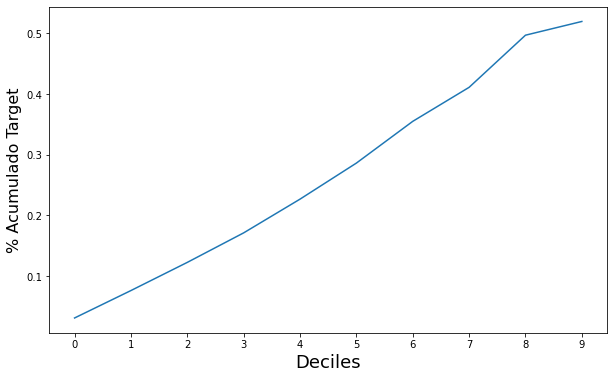

In [34]:
fig = plt.figure(figsize=(10,6))
plt.xlabel('Deciles', fontsize=18)
plt.ylabel('% Acumulado Target', fontsize=16)
#plt.title("Acumulado de pedidos con Devoluciones en base a los quartiles de la variable Price")
a = (train.groupby("priceDecile").target.sum().cumsum().to_frame("acumulado")) / len(train)
plt.plot(a.index.values.astype(str), a.acumulado.values)
fig.savefig('data/08_reporting/grafico1PriceDecile.png')   # save the figure to file


2020-06-02 14:44:41,341 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-06-02 14:44:41,348 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


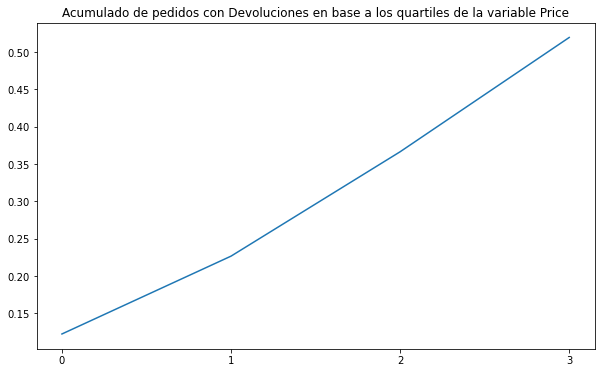

In [26]:
plt.figure(figsize=(10,6))
plt.title("Acumulado de pedidos con Devoluciones en base a los quartiles de la variable Price")
a = (train.groupby("priceQuartile").target.sum().cumsum().to_frame("acumulado")) / len(train)
plt.plot(a.index.values.astype(str), a.acumulado.values)


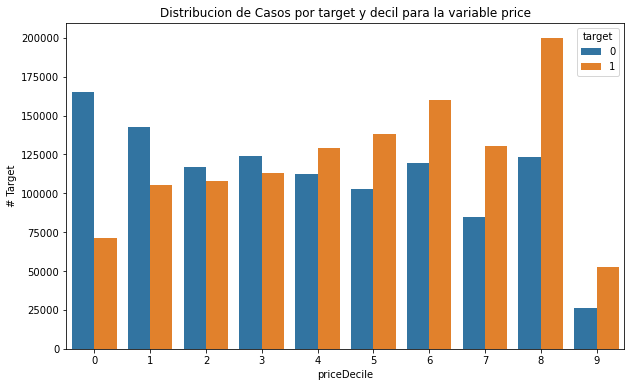

In [38]:
fig = plt.figure(figsize=(10,6))
plt.title("Distribucion de Casos por target y decil para la variable price")

a = train.groupby(["priceDecile", "target"],as_index=False).size().to_frame("# Target").reset_index()
ax = sns.barplot(x="priceDecile", y="# Target", hue="target", data=a)
fig.savefig('data/08_reporting/grafico1PriceDecileBarras.png')   # save the figure to file


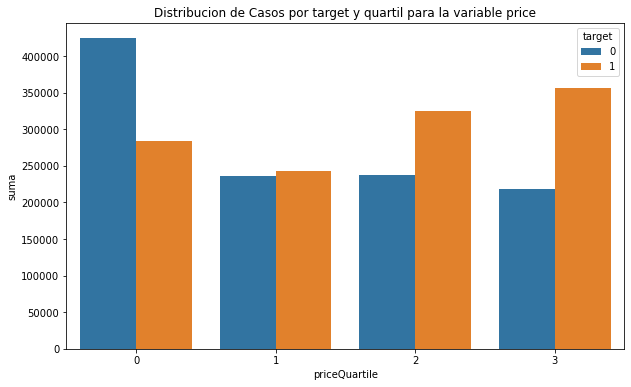

In [39]:
fig = plt.figure(figsize=(10,6))
plt.title("Distribucion de Casos por target y quartil para la variable price")

a = train.groupby(["priceQuartile", "target"],as_index=False).size().to_frame("suma").reset_index()
ax = sns.barplot(x="priceQuartile", y="suma", hue="target", data=a)
fig.savefig('data/08_reporting/grafico1PriceQuartilBarras.png')   # save the figure to file


In [43]:
train["rrpDecile"] = pd.qcut(train.rank, 10, labels=False)
train["rrpQuartile"] = pd.qcut(train.rank, 4, labels=False)

ValueError: Input array must be 1 dimensional

In [93]:
train = train.sort_values(by="rrp").reset_index()
train["sarasa"] = list(train.index.values)

In [94]:
train["rrpDecile"] = pd.qcut(train.sarasa, 10, labels=False)
train["rrpQuartile"] = pd.qcut(train.sarasa, 4, labels=False)

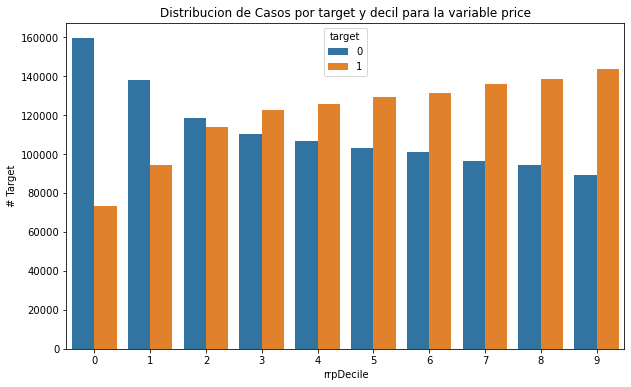

In [98]:
fig = plt.figure(figsize=(10,6))
plt.title("Distribucion de Casos por target y decil para la variable price")

a = train.groupby(["rrpDecile", "target"],as_index=False).size().to_frame("# Target").reset_index()
ax = sns.barplot(x="rrpDecile", y="# Target", hue="target", data=a)
fig.savefig('data/08_reporting/grafico1RRPDecileBarras.png')   # save the figure to file


In [88]:
train.sarasa

0                0
1                1
2                2
3                3
4                4
            ...   
2325160    2325160
2325161    2325161
2325162    2325162
2325163    2325163
2325164    2325164
Name: sarasa, Length: 2325165, dtype: int64

In [12]:
def plot_stats(data, feature, target="target", targetValue = 0, label_rotation=False, horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,"Number of cases": temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = data[[feature, target]].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by=target, ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of cases",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y=target, order=cat_perc[feature], data=cat_perc)
    if targetValue != 0:
        ax2.axhline(0.05, ls='--')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel("Percent of {} with value 1 [%]".format(target), fontsize=10)
    plt.tick_params(axis="both", which="major", labelsize=10)

    plt.show()

In [13]:
def plot_distribution(data, feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(data[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 

In [14]:
def plot_distribution_comp(data, var, target = "target", nrow=2):
    
    i = 0
    t1 = data.loc[data[target] != 0]
    t0 = data.loc[data[target] == 0]

    sns.set_style("whitegrid")
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="{} = 1".format(target))
        sns.kdeplot(t0[feature], bw=0.5,label="{} = 0".format(target))
        plt.ylabel("Density plot", fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis="both", which="major", labelsize=12)
    plt.show();

In [15]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_b_o_distribution(data, feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = data[feature].dropna()
    filtered = x[~is_outlier(x)]
    sns.distplot(filtered,color=color, kde=True,bins=100)
    plt.show() 


In [17]:
train["target"] = np.where(train.returnQuantity >=1, 1, 0)

In [18]:
categoricalVariables = ['articleID', 'colorCode', 'sizeCode', 'productGroup', 'quantity', 'paymentMethod', 
'orderQuantity', 'month', 'week', 'day', 'fortnight', 'weekday',
'itemQuantity'] 

In [19]:
continuousVariables = ['price', 'rrp', 'orderPrice', 'unitPrice',
'rrpPriceRatio', 'orderUnitPriceRatio', 'orderPriceRatio',
'orderQuantityRatio', 'orderDiscountPercent', 'paidPrice',
'mean_price_ratio',  'itemQuantityRatio', 'colorCode_encoded', 'sizeCode_encoded', 'customerID_encoded',
'paymentMethod_encoded', 'voucherID_encoded', 'deviceID_encoded',
'productGroup_encoded', 'articleID-colorCode_encoded',
'articleID-sizeCode_encoded', 'articleID-sizeCode-colorCode_encoded',
'productGroup-colorCode_encoded', 'productGroup-sizeCode_encoded',
'productGroup-sizeCode-colorCode_encoded', 'productGroup-month_encoded',
'productGroup-fortnight_encoded']

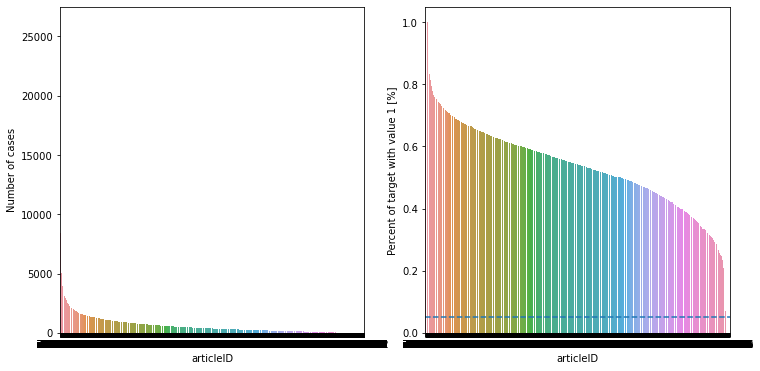

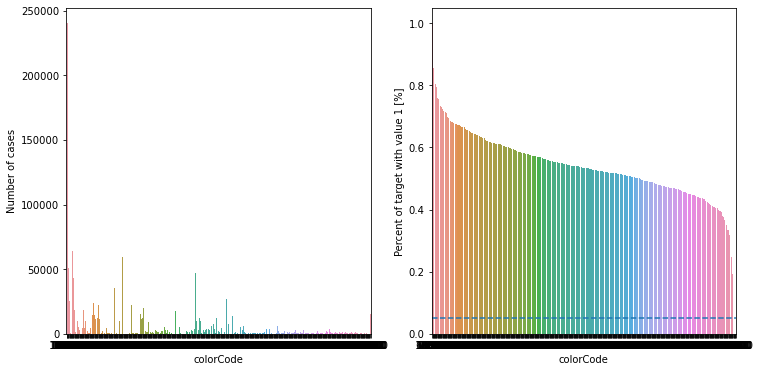

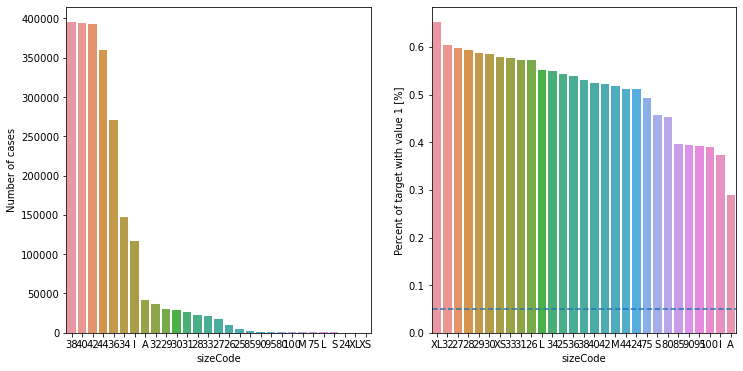

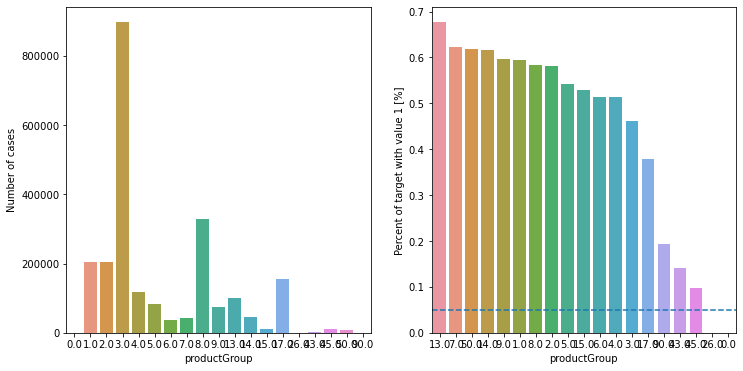

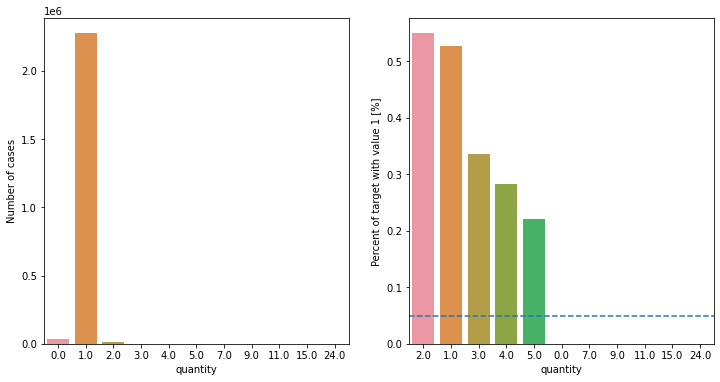

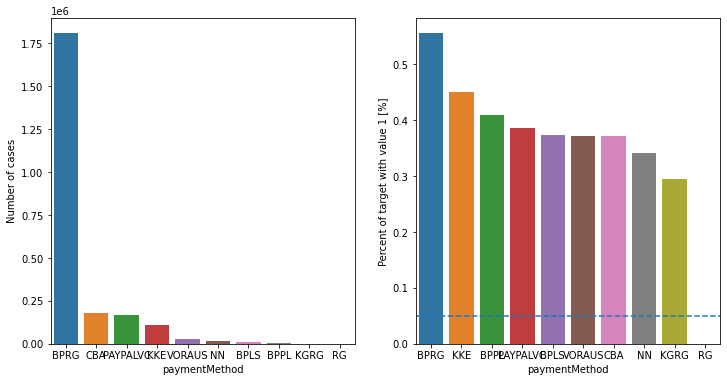

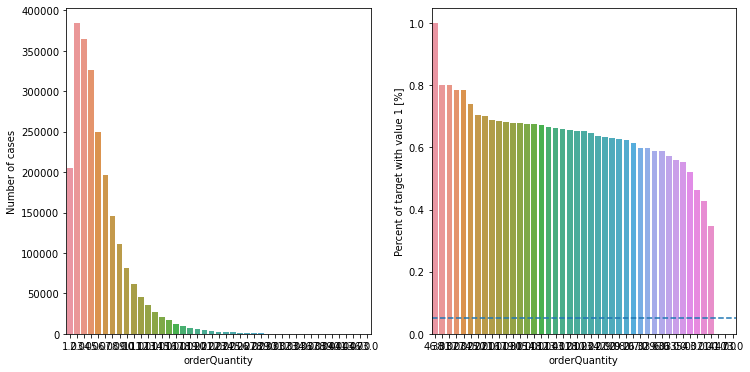

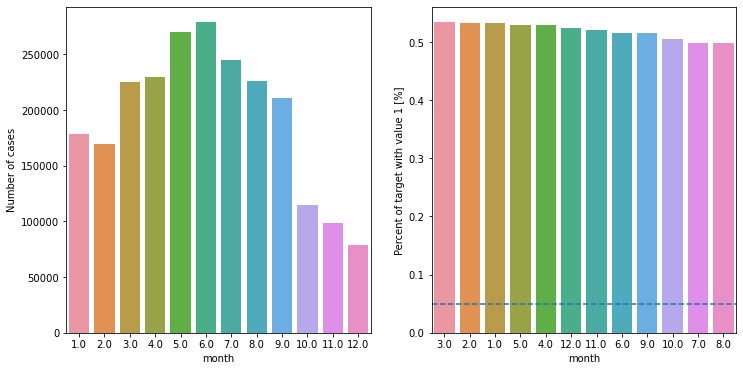

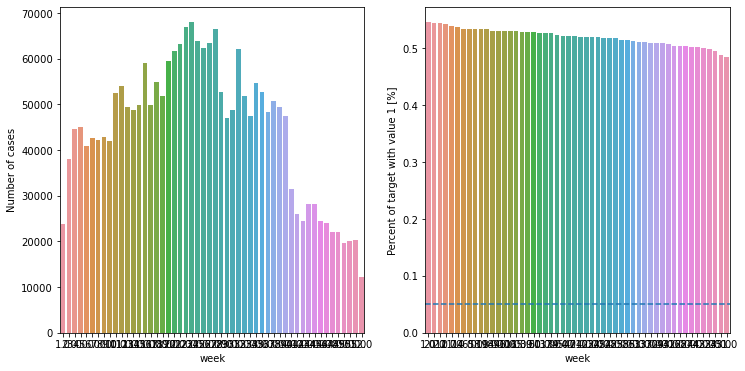

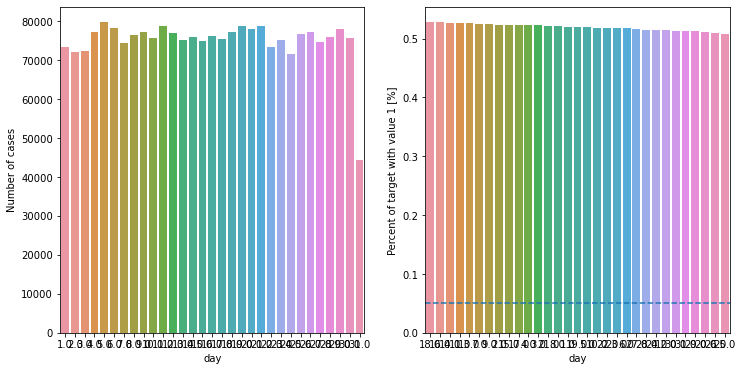

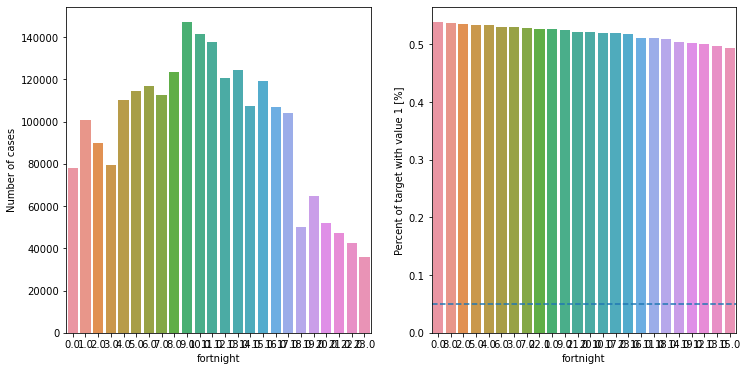

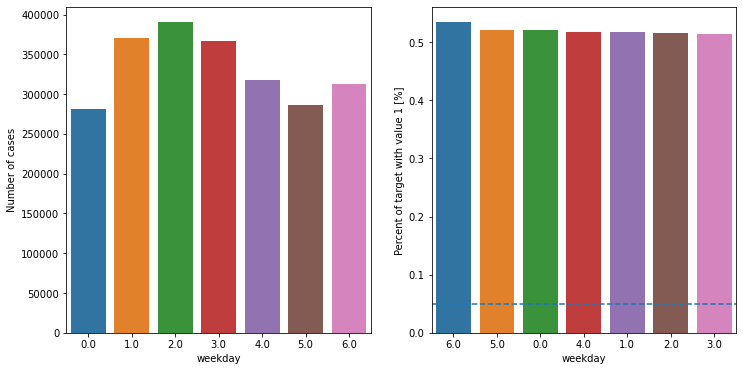

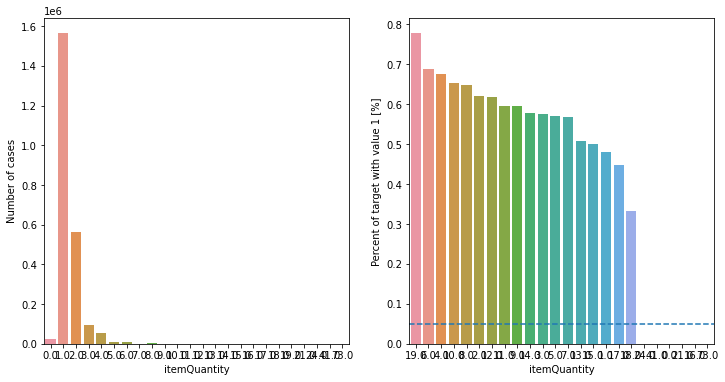

In [20]:
targetValue = train[train.target==1].shape[0] / train.shape[0]
for variable in categoricalVariables:
    plot_stats(train, variable, target="target", targetValue = targetValue)